In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import AllTogether as t
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
get_ipython().run_line_magic('matplotlib', 'inline')
# Loading data together with the table schema for inference
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 180)

In [79]:
''' Interesting questions:
1. Most desired languages by developers?
2. Which programming languages have the biggest impact on salary?
3. Influence of different factors on job satisfaction?
'''
#     Loading the data from the 2019 survey and the table schema

df = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_public.csv')
schema = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_schema.csv')
# Check the schema
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
5,Employment,Which of the following best describes your current employment status?
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree-granting college or university program?"
8,EdLevel,Which of the following best describes the highest level of formal education that you’ve completed?
9,UndergradMajor,What was your main or most important field of study?


In [80]:
# Create a dataframe to work on in relation to Languages developers would like to work next year
df_desired_languages = df.dropna(axis = 0, subset= ['LanguageDesireNextYear'])
df_desired_languages

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.00,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.00,Man,No,Straight / Heterosexual,NaN,N

In [81]:
# Unpack the desired languages values from the questionnaire
desired_languages_value_list =[]
for line in df_desired_languages['LanguageDesireNextYear']:
    line_length = (len(line.split(';')))
    line_list = line.split(';')
    for i in range(0, line_length):
        desired_languages_value_list.append(line_list[i].lstrip())
# Create a series out of the values list to work on more easily
df_desired_languages_series = pd.Series(desired_languages_value_list)

In [82]:
# Check which answers are most popular, percen wise
round((df_desired_languages_series.value_counts()/sum(df_desired_languages_series.value_counts())*100),2)

JavaScript              11.24
Python                  10.05
HTML/CSS                 9.21
SQL                      8.43
TypeScript               5.96
Java                     5.91
C#                       5.64
Bash/Shell/PowerShell    5.35
Go                       4.29
C++                      4.23
Kotlin                   3.33
PHP                      3.22
C                        2.80
Rust                     2.64
Swift                    2.21
WebAssembly              2.12
Other(s):                1.99
Ruby                     1.82
R                        1.69
Scala                    1.40
Assembly                 1.17
Dart                     1.11
Elixir                   0.95
F#                       0.88
Objective-C              0.72
Clojure                  0.69
Erlang                   0.53
VBA                      0.41
dtype: float64

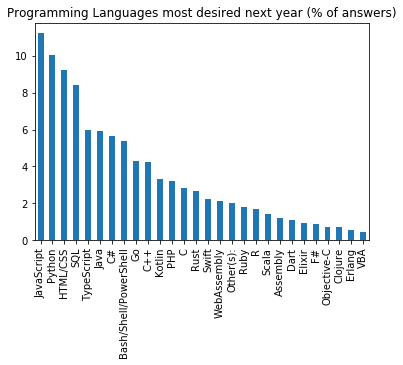

In [83]:
round((df_desired_languages_series.value_counts()/sum(df_desired_languages_series.value_counts())*100),2).plot(kind="bar",  title = "Programming Languages most desired next year (% of answers)", )
# Java Script/Python/HMTL/CSS as languages people would like to work the most on

In [84]:
# II. # Unpack multiple choice answers for interesting columns for influence of different 
#Columns of interest 

# Retrieve all text columns
all_category = df.select_dtypes(include = ['object']).columns
# Columns to unpack as they include_multiple_choice
columns_multiple_choice=['LanguageWorkedWith', 'DatabaseWorkedWith', 'PlatformWorkedWith']
columns_multiple_choice=['LanguageWorkedWith']
interesting_category = ['YearsCodePro','OpenSourcer']

In [86]:
# Create a working_df to work on. Drop NA's from columns to be used for inference
# df_multiple_choice_cleared = df.dropna(axis = 0, subset = all_category)


df_multiple_choice_cleared = df.dropna(axis = 0, subset = columns_multiple_choice)

# Drop the columns i'm not interesed in from the Data Frame
# for column in all_category:
#     if column not in all_cat:
#         df_multiple_choice_cleared = df_multiple_choice_cleared.drop(columns = column)

# for column in all_category:
#     if column not in all_category:
#         df_multiple_choice_cleared = df_multiple_choice_cleared.drop(columns = column)

In [87]:
def unpack_multiple_choice (data_frame, column_name):

    '''
    
    INPUT:
    data_frame  - data_frame from which values will be unpacked
    column_name - column comprised of a mulitple choice answers that requires unpacking
    OUTPUT:
    data_frame - a dataframe holding the one-hot encoded values
    
    Provides a dataframe that has a multiple chocie variable one-hot encoded
    '''
    
    unpacked_value_list =[]
#     Unpack the values from the column
    for line in data_frame[column_name]:
        line_length = (len(line.split(';')))
        line_list = line.split(';')
        for i in range(0, line_length):
            unpacked_value_list.append(line_list[i].lstrip())
    unpacked_value_list_series = pd.Series(unpacked_value_list)
    unpacked_value_list_series_unique = unpacked_value_list_series.unique()
    
#     Create a zero filled array which will be used to note the values
    value_rows = np.zeros((data_frame.shape[0],len(unpacked_value_list_series_unique)+ 1))
#     Create a dictionary for the values that can later be used to amend the zero array
    value_rows.shape
    dictionary_values_import = []
    for i in range(0, len(unpacked_value_list_series_unique)):
        dictionary_values_import.append(i)
# Create a dictionary that will play a role for localizing the zero-array column that neds to be updated
    unique_values_dictionary  = dict(list(zip(unpacked_value_list_series_unique,dictionary_values_import)))
    print(unique_values_dictionary)
# Add a respondent column to allow for an easier join
    unique_values_dictionary['Respondent'] = len(unique_values_dictionary)+ 1 
    current_row = -1

#     Unpack the column values into the zero array
    for line in data_frame[column_name]:
        line_length = (len(line.split(';')))
        line_list = line.split(';')
        current_row += 1
        value_rows[current_row,len(unpacked_value_list_series_unique) ] = data_frame['Respondent'].values[current_row]
        for i in range(0, line_length):
            current_item = line_list[i].lstrip()
            column_ref = unique_values_dictionary[current_item]
            value_rows[current_row,column_ref] = 1
    
#     Create a dataframe holding the values
    values_data_frame = pd.DataFrame(columns=unique_values_dictionary.keys(),data = value_rows)
    values_data_frame = values_data_frame.add_prefix(column_name + "_")
#   Get rid of the old column that has been one-hot encoded
    data_frame = data_frame.drop([column_name], axis = 1)
    values_data_frame = values_data_frame.rename(columns = ({column_name + '_' + 'Respondent': 'Respondent'}))
#   Merge the data_frame with the newly created values data frame
    data_frame = pd.merge(left=data_frame, right=values_data_frame, left_on='Respondent', right_on='Respondent')
    return data_frame

In [88]:
for column in (columns_multiple_choice):
    df_multiple_choice_cleared = unpack_multiple_choice(df_multiple_choice_cleared, column)


{'HTML/CSS': 0, 'Java': 1, 'JavaScript': 2, 'Python': 3, 'C++': 4, 'C': 5, 'C#': 6, 'SQL': 7, 'VBA': 8, 'R': 9, 'Bash/Shell/PowerShell': 10, 'Ruby': 11, 'Rust': 12, 'TypeScript': 13, 'WebAssembly': 14, 'Other(s):': 15, 'Go': 16, 'PHP': 17, 'Assembly': 18, 'Kotlin': 19, 'Swift': 20, 'Objective-C': 21, 'Elixir': 22, 'Erlang': 23, 'Clojure': 24, 'F#': 25, 'Scala': 26, 'Dart': 27}


In [89]:
# Easier check what's the average declared salary based on the langauge
df_multiple_choice_cleared = df_multiple_choice_cleared.dropna(axis = 0, subset = ['ConvertedComp'])


In [90]:
df_multiple_choice_cleared = df_multiple_choice_cleared.drop(all_category, errors = 'ignore')
df_multiple_choice_cleared

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,LanguageWorkedWith_HTML/CSS,LanguageWorkedWith_Java,LanguageWorkedWith_JavaScript,LanguageWorkedWith_Python,LanguageWorkedWith_C++,LanguageWorkedWith_C,LanguageWorkedWith_C#,LanguageWorkedWith_SQL,LanguageWorkedWith_VBA,LanguageWorkedWith_R,LanguageWorkedWith_Bash/Shell/PowerShell,LanguageWorkedWith_Ruby,LanguageWorkedWith_Rust,LanguageWorkedWith_TypeScript,LanguageWorkedWith_WebAssembly,LanguageWorkedWith_Other(s):,LanguageWorkedWith_Go,LanguageWorkedWith_PHP,LanguageWorkedWith_Assembly,LanguageWorkedWith_Kotlin,LanguageWorkedWith_Swift,LanguageWorkedWith_Objective-C,LanguageWorkedWith_Elixir,LanguageWorkedWith_Erlang,LanguageWorkedWith_Clojure,LanguageWorkedWith_F#,LanguageWorkedWith_Scala,LanguageWorkedWith_Dart
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or tool without taking a formal course",100 to 499 employees,"Designer;Developer, back-end;Developer, front-end;Developer, full-stack",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new opportunities",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies I'd be working with;Remote work options;Flex time or a flexible schedule",I was preparing for a job search,THB,Thai baht,23000.00,Monthly,8820.00,40.00,There's no schedule or spec; I work on what seems most important or urgent,Distracting work environment;Inadequate access to necessary tools;Lack of support from management,Less than once per month / Never,Home,Average,No,nan,"No, but I think we should",Not sure,I have little or no influence,Elixir;HTML/CSS,PostgreSQL,PostgreSQL,NaN,NaN,NaN,Other(s):,NaN,NaN,Vim;Visual Studio Code,Linux-based,I do not use containers,NaN,NaN,Yes,Yes,Yes,Reddit,In real life (in person),Username,2011,A few times per week,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,6-10 times per week,They were about the same,NaN,Yes,Less than once per month or monthly,Yes,"No, I've heard of them, but I am not part of a private Q&A instance",Neutral,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on technologies you're interested in,28.00,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software is about the same,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering","Taken an online course in programming or software development (e.g. a MOOC);Received on-the-

(55617, 28)


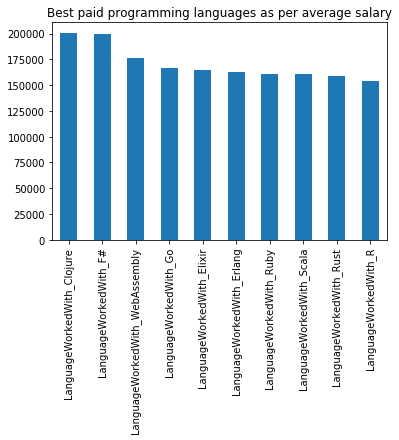

In [91]:
unpacked = df_multiple_choice_cleared.iloc[:, 84:].columns


n_by_state = df_multiple_choice_cleared[unpacked].multiply(df_multiple_choice_cleared['ConvertedComp'], axis = 'index')
print(n_by_state.shape)
n_by_state  = n_by_state
pd.options.display.float_format = '{:.2f}'.format
n_by_state.where(n_by_state > 0, inplace = True)
n_by_state = n_by_state.mean()
n_by_state 
n_by_state.sort_values(ascending = False)
n_by_state.nlargest(10).sort_values(ascending = False).plot(kind = 'bar', title = 'Best paid programming languages as per average salary')

In [98]:
# III. Let check what influences satisfaction

In [99]:
df = pd.read_csv('C:\\Users\\SWOZNIA\\survey_results_public.csv')

In [100]:
#  Unpack multiple choice answers for interesting columns for influence on salary
# These are:
#Columns of interest 

working_df = df.copy()
all_category = df.select_dtypes(include = ['object'])

# columns_for_dummy = ['OpenSourcer', 'YearsCode', 'YearsCodePro','WorkRemote',  'WorkLoc',]
# columns_multiple_choice=['LanguageWorkedWith']
columns_multiple_choice=['']
all_cat = ['OpenSourcer', 'YearsCode', 'YearsCodePro','WorkRemote',  'WorkLoc','JobFactors','LanguageWorkedWith', 'LanguageDesireNextYear']
all_cat = ['OpenSourcer',  'WorkRemote',  'WorkLoc', 'JobSat']

# Renormalize Job_Satisfaction, 
# Renormalize Years?
all_category

,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompFreq,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,"I am not primarily a developer, but I write code sometim

In [101]:
working_df['JobSat'].notna().sum()

70988

In [102]:

value_dictionary = {'Very dissatisfied': 1, 'Slightly dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied':4, 
                   'Very satisfied': 5}
print(value_dictionary.get("Very dissatisfied"))

1


In [103]:
# Normalize the Job_Satisfaction category

value_dictionary = {'Very dissatisfied': 1, 'Slightly dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Slightly satisfied':4, 
                   'Very satisfied': 5}

for i in range(1,working_df['JobSat'].shape[0]):
    working_df.at[i,'JobSat'] = value_dictionary.get(working_df.at[i,'JobSat'])

working_df['JobSat'].unique()


array([nan, None, 4, 2, 3, 5, 1], dtype=object)

In [104]:
working_df['JobSat']

0         NaN
1        None
2           4
3           4
4           2
         ... 
88878    None
88879    None
88880    None
88881    None
88882    None
Name: JobSat, Length: 88883, dtype: object

In [105]:
df_multiple_choice_cleared = working_df.dropna(axis = 0, subset = all_cat)
df_multiple_choice_cleared['Respondent']

2            3
3            4
4            5
5            6
6            7
         ...  
88326    88879
88327    88880
88328    88881
88329    88882
88330    88883
Name: Respondent, Length: 69525, dtype: int64

In [106]:
for column in all_category:
    if column not in all_cat:
        df_multiple_choice_cleared = df_multiple_choice_cleared.drop(columns = column)



In [107]:
df_multiple_choice_cleared
working_copy_df = df_multiple_choice_cleared.copy()
working_copy_df

,Respondent,OpenSourcer,JobSat,CompTotal,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,CodeRevHrs,Age
2,3,Never,4,23000.00,8820.00,40.00,Less than once per month / Never,Home,nan,28.00
3,4,Never,4,61000.00,61000.00,80.00,Less than once per month / Never,Home,nan,22.00
4,5,Once a month or more often,2,nan,nan,55.00,A few days each month,Office,nan,30.00
5,6,Never,4,40000.00,366420.00,15.00,A few days each month,Home,nan,28.00
6,7,Never,3,nan,nan,32.00,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",6.00,42.00
...,...,...,...,...,...,...,...,...,...,...
88326,88879,Never,3,6000.00,82488.00,37.75,Less than once per month / Never,Home,10.00,34.00
88327,88880,Never,3,nan,nan,nan,"More than half, but not all, the time",Home,nan,nan
88328,88881,Once a month or more often,3,60000.00,68745.00,39.00,A few days each month,Office,10.00,37.00
88329,88882,Never,1,42768.00,588012.00,40.00,Less than once per month / Never,Home,5.00,nan


In [108]:
def unpack_multiple_choice (data_frame, column_name):
    unpacked_value_list =[]
    for line in data_frame[column_name]:

        line_length = (len(line.split(';')))
        line_list = line.split(';')
        for i in range(0, line_length):
            unpacked_value_list.append(line_list[i].lstrip())
    unpacked_value_list_series = pd.Series(unpacked_value_list)
    unpacked_value_list_series_unique = unpacked_value_list_series.unique()
    value_rows = np.zeros((data_frame.shape[0],len(unpacked_value_list_series_unique)+ 1))
    
    value_rows.shape
    dictionary_values_import = []
    for i in range(0, len(unpacked_value_list_series_unique)):
        dictionary_values_import.append(i)

    unique_values_dictionary  = dict(list(zip(unpacked_value_list_series_unique,dictionary_values_import)))
    print(unique_values_dictionary)
    unique_values_dictionary['Respondent'] = len(unique_values_dictionary)+ 1 
    current_row = -1
    for line in data_frame[column_name]:
        line_length = (len(line.split(';')))
        line_list = line.split(';')
        current_row += 1
        value_rows[current_row,len(unpacked_value_list_series_unique) ] = data_frame['Respondent'].values[current_row]
        for i in range(0, line_length):
            current_item = line_list[i].lstrip()
            column_ref = unique_values_dictionary[current_item]
            value_rows[current_row,column_ref] = 1
    
    values_data_frame = pd.DataFrame(columns=unique_values_dictionary.keys(),data = value_rows)
    values_data_frame = values_data_frame.add_prefix(column_name + "_")
    data_frame = data_frame.drop([column_name], axis = 1)
    values_data_frame = values_data_frame.rename(columns = ({column_name + '_' + 'Respondent': 'Respondent'}))
    data_frame = pd.merge(left=data_frame, right=values_data_frame, left_on='Respondent', right_on='Respondent')
    return data_frame

In [110]:
working_copy_df

,Respondent,OpenSourcer,JobSat,CompTotal,ConvertedComp,WorkWeekHrs,WorkRemote,WorkLoc,CodeRevHrs,Age
2,3,Never,4,23000.00,8820.00,40.00,Less than once per month / Never,Home,nan,28.00
3,4,Never,4,61000.00,61000.00,80.00,Less than once per month / Never,Home,nan,22.00
4,5,Once a month or more often,2,nan,nan,55.00,A few days each month,Office,nan,30.00
5,6,Never,4,40000.00,366420.00,15.00,A few days each month,Home,nan,28.00
6,7,Never,3,nan,nan,32.00,All or almost all the time (I'm full-time remote),"Other place, such as a coworking space or cafe",6.00,42.00
...,...,...,...,...,...,...,...,...,...,...
88326,88879,Never,3,6000.00,82488.00,37.75,Less than once per month / Never,Home,10.00,34.00
88327,88880,Never,3,nan,nan,nan,"More than half, but not all, the time",Home,nan,nan
88328,88881,Once a month or more often,3,60000.00,68745.00,39.00,A few days each month,Office,10.00,37.00
88329,88882,Never,1,42768.00,588012.00,40.00,Less than once per month / Never,Home,5.00,nan


In [111]:
# Dummy variables for the single choice questions
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [112]:
wrangled_df = create_dummy_df(working_copy_df,columns_for_dummy,True )
# wrangled_df = wrangled_df.drop('LanguageWorkedWith', axis = 1)

In [113]:
wrangled_df

,Respondent,JobSat,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,OpenSourcer_nan,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",WorkRemote_nan,WorkLoc_Office,"WorkLoc_Other place, such as a coworking space or cafe",WorkLoc_nan
2,3,4,23000.00,8820.00,40.00,nan,28.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,4,4,61000.00,61000.00,80.00,nan,22.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,5,2,nan,nan,55.00,nan,30.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,6,4,40000.00,366420.00,15.00,nan,28.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,7,3,nan,nan,32.00,6.00,42.00,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88326,88879,3,6000.00,82488.00,37.75,10.00,34.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0
88327,88880,3,nan,nan,nan,nan,nan,0,1,0,0,0,0,0,0,0,1,0,0,0,0
88328,88881,3,60000.00,68745.00,39.00,10.00,37.00,0,0,1,0,0,0,0,0,0,0,0,1,0,0
88329,88882,1,42768.00,588012.00,40.00,5.00,nan,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [115]:
# Creating a Linear model that will help to understand the most important coefficients influencing Job Satisfaction
# As well as the impact of some specific on Job Satisfaction
# y - is going to be the response vector which is going to be analyzed based on the 
# X - variable used to predict the response vector


In [116]:
wrangled_df_converted_comp_cleaned = wrangled_df.dropna(subset=['ConvertedComp'], axis = 0)
wrangled_df_converted_comp_cleaned = wrangled_df_converted_comp_cleaned.dropna(axis = 0)

y = wrangled_df_converted_comp_cleaned['JobSat']
X = wrangled_df_converted_comp_cleaned.drop('JobSat', axis = 1)
X = X.drop(['CompTotal'], axis =1)
# X = wrangled_df_converted_comp_cleaned.drop(columns_multiple_choice, axis = 1)
 # Mean function
# fill_mean = lambda col: col.fillna(col.mean())
# X =  X.apply(fill_mean, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state=42) 
# Instantiate the LinearRegression model
lm_model = LinearRegression(normalize=True) # Instantiate
# Fit the LR model to the data
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)
test_score =  r2_score(y_test, y_test_preds)
train_score =  r2_score(y_train, y_train_preds)
    
print(test_score, train_score)

0.03238315659849211 0.02876023215291612


In [117]:
X

,Respondent,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,OpenSourcer_Less than once per year,OpenSourcer_Never,OpenSourcer_Once a month or more often,OpenSourcer_nan,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",WorkRemote_nan,WorkLoc_Office,"WorkLoc_Other place, such as a coworking space or cafe",WorkLoc_nan
8,9,95179.00,32.00,12.00,23.00,0,0,1,0,0,0,0,0,1,0,0,1,0,0
12,13,90000.00,40.00,5.00,28.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13,14,57060.00,40.00,4.00,31.00,1,0,0,0,0,0,0,0,1,0,0,1,0,0
16,17,65277.00,45.00,5.00,29.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
18,19,31140.00,8.00,3.00,31.00,0,1,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88323,88876,180000.00,40.00,3.00,23.00,0,1,0,0,0,0,0,1,0,0,0,1,0,0
88324,88877,2000000.00,45.00,5.00,48.00,1,0,0,0,0,0,0,0,1,0,0,1,0,0
88325,88878,130000.00,40.00,3.00,26.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0
88326,88879,82488.00,37.75,10.00,34.00,0,1,0,0,0,0,0,0,1,0,0,0,0,0


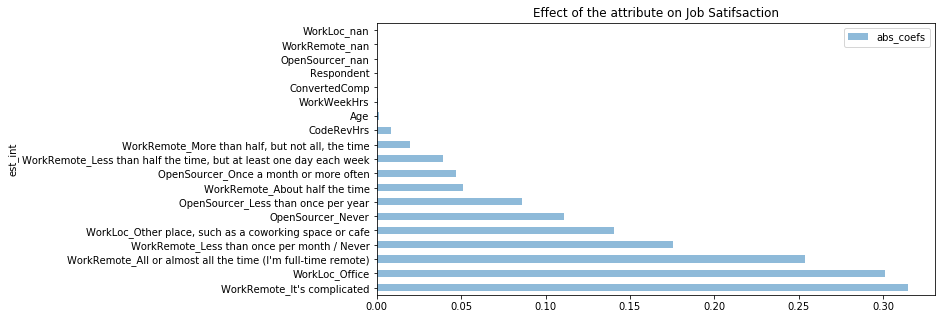

In [141]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)
test_Df = pd.DataFrame(lm_model.coef_)
pd.options.display.float_format = '{:.2f}'.format
#A quick look at the top results
coef_df.sort_values(by = 'abs_coefs')
coef_df.head(100)# Check the general influence of coefficients
coef_df[['est_int','abs_coefs']].plot(kind = "barh", x = 'est_int', y = 'abs_coefs', alpha=0.5, title = 'Effect of the attribute on Job Satifsaction', figsize=(10,5))

# coef_df[['est_int','abs_coefs']]

In [ ]:
# Unfortunately the model and the information provided did not yeild much information